In [161]:
import requests
from requests.exceptions import HTTPError
import pandas as pd
import json as js
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
# Uncomment this if you like to use the old MPL library
#from mpl_finance import candlestick_ohlc
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.ticker as tkr
%matplotlib inline
import cufflinks as cf
import seaborn as sns

In [162]:
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # default seaborn look and feel
plt.style.use('ggplot')
REST_API = 'https://api.pro.coinbase.com'
PRODUCTS = REST_API+'/products'
# I am only interested in a few currencies that I want to trade, so let's add them here:
MY_CURRENCIES = ['BTC-EUR','ETH-EUR','LTC-EUR','BCH-EUR'] 


In [163]:
def connect(url, *args, **kwargs):
    try:
        if kwargs.get('param', None) is not None:
            response = requests.get(url,params)
        else:
            response = requests.get(url)
        response.raise_for_status()
        #print('HTTP connection success!')
        return response
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Other error occurred: {err}')

In [164]:
#Reusable Rest Connect Class
response = connect(PRODUCTS)
response_content = response.content
response_text = response.text
response_headers = response.headers

In [165]:
start_date = (datetime.today() - timedelta(days=300)).isoformat()
end_date = datetime.now().isoformat()
# Please refer to the coinbase documentation on the expected parameters
params = {'start':start_date, 'end':end_date, 'granularity':'86400'}
response = connect(PRODUCTS+'/BTC-USD/candles', param = params)
response_text = response.text
df_history = pd.read_json(response_text)
# Add column names in line with the Coinbase Pro documentation
df_history.columns = ['time','low','high','open','close','volume']


In [166]:
# We will add a few more columns just for better readability
df_history['date'] = pd.to_datetime(df_history['time'], unit='s')
df_history['year'] = pd.DatetimeIndex(df_history['date']).year
df_history['month'] = pd.DatetimeIndex(df_history['date']).month
df_history['day'] = pd.DatetimeIndex(df_history['date']).day
#Sort by date ascending 
df_history.sort_values(by='date', ascending=True, inplace=True)
# Only display the first 5 rows
df_history.head(5).drop(['time','date'], axis=1)

,low,high,open,close,volume,year,month,day
299,15090.1,15481.1,15342.1,15315.0,13489.7,2020,11,10
298,15293.0,16000.0,15315.5,15705.8,15257.4,2020,11,11
297,15446.8,16370.9,15705.8,16310.8,22153.7,2020,11,12
296,15975.0,16491.9,16310.8,16339.6,14593.5,2020,11,13
295,15708.2,16339.6,16339.6,16082.0,9205.9,2020,11,14


In [167]:
df_history.set_index('date', inplace=True)
df_history.sort_index(ascending=True)
df_history

,time,low,high,open,close,volume,year,month,day
date,,,,,,,,,
2020-11-10,1604966400,15090.1,15481.1,15342.1,15315.0,13489.7,2020,11,10
2020-11-11,1605052800,15293.0,16000.0,15315.5,15705.8,15257.4,2020,11,11
2020-11-12,1605139200,15446.8,16370.9,15705.8,16310.8,22153.7,2020,11,12
2020-11-13,1605225600,15975.0,16491.9,16310.8,16339.6,14593.5,2020,11,13
2020-11-14,1605312000,15708.2,16339.6,16339.6,16082.0,9205.9,2020,11,14
...,...,...,...,...,...,...,...,...,...
2021-09-01,1630454400,46537.6,49125.0,47110.3,48839.9,13010.8,2021,9,1
2021-09-02,1630540800,48620.7,50392.2,48834.3,49279.4,14120.4,2021,9,2
2021-09-03,1630627200,48349.7,51064.4,49279.4,50025.0,14577.2,2021,9,3


In [168]:
qf = cf.QuantFig(df_history.loc["2021"])


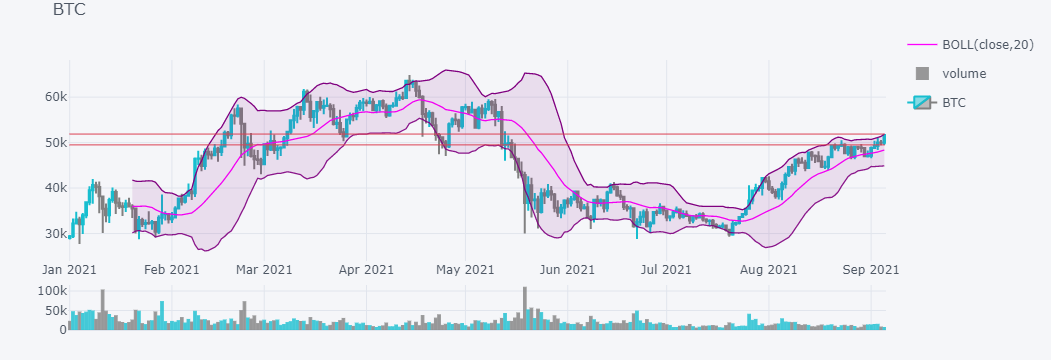

In [169]:
today = datetime.today().strftime('%Y-%m-%d')
nowMinus15 = (datetime.today() - timedelta(days=5)).strftime('%Y-%m-%d')
nowMinus30 = (datetime.today() - timedelta(days=30)).strftime('%Y-%m-%d')
qf.add_resistance(date = today)
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','purple'],fill=True)
#qf.add_trendline(date0 = nowMinus30, date1 = today)
qf.add_support(date = today)
qf.add_volume()
qf.iplot(title = "BTC", name = "BTC")

'2021-09-05'